In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()
import anndata as ad
print(ad.__version__)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.6.1
scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/LiverCancer/BGI_LiverCancer/'
P02 =ad.read_csv(path + 'HCC_P02_count_mat.csv', delimiter= '\t', first_column_names=True)

In [3]:
P02 = P02.T

In [4]:
Genes = P02.var.index.tolist()
import mygene
mg = mygene.MyGeneInfo()
Names = mg.querymany(Genes, scopes = 'ensembl.gene')
df = pd.DataFrame(Names)
df

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

,_id,_score,entrezgene,name,notfound,query,symbol,taxid
0,7105,17.872930,7105.0,tetraspanin 6,NaN,ENSG00000000003,TSPAN6,9606.0
1,64102,18.203289,64102.0,tenomodulin,NaN,ENSG00000000005,TNMD,9606.0
2,8813,17.884449,8813.0,dolichyl-phosphate mannosyltransferase subunit...,NaN,ENSG00000000419,DPM1,9606.0
3,57147,17.903358,57147.0,SCY1 like pseudokinase 3,NaN,ENSG00000000457,SCYL3,9606.0
4,55732,18.431734,55732.0,chromosome 1 open reading frame 112,NaN,ENSG00000000460,C1orf112,9606.0
5,2268,17.512253,2268.0,"FGR proto-oncogene, Src family tyrosine kinase",NaN,ENSG00000000938,FGR,9606.0
6,3075,17.862701,3075.0,complement factor H,NaN,ENSG00000000971,CFH,9606.0
7,2519,17.719020,2519.0,alpha-L-fucosidase 2,NaN,ENSG00000001036,FUCA2,9606.0
8,2729,17.845133,2729.0,glutamate-cysteine ligase catalytic subunit,NaN,ENSG00000001084,GCLC,9606.0
9,4800,17.517290,4800.0,nuclear transcription factor Y subunit alpha,NaN,ENSG00000001167,NFYA,9606.0


In [5]:
df1 = df
df1 = df1.drop_duplicates(subset=['query'])
print(df1.head(5))
print(df1.shape)
df1.head(5)

     _id     _score  entrezgene  \
0   7105  17.872930      7105.0   
1  64102  18.203289     64102.0   
2   8813  17.884449      8813.0   
3  57147  17.903358     57147.0   
4  55732  18.431734     55732.0   

                                                name notfound  \
0                                      tetraspanin 6      NaN   
1                                        tenomodulin      NaN   
2  dolichyl-phosphate mannosyltransferase subunit...      NaN   
3                           SCY1 like pseudokinase 3      NaN   
4                chromosome 1 open reading frame 112      NaN   

             query    symbol   taxid  
0  ENSG00000000003    TSPAN6  9606.0  
1  ENSG00000000005      TNMD  9606.0  
2  ENSG00000000419      DPM1  9606.0  
3  ENSG00000000457     SCYL3  9606.0  
4  ENSG00000000460  C1orf112  9606.0  
(49918, 8)


,_id,_score,entrezgene,name,notfound,query,symbol,taxid
0,7105,17.872930,7105.0,tetraspanin 6,NaN,ENSG00000000003,TSPAN6,9606.0
1,64102,18.203289,64102.0,tenomodulin,NaN,ENSG00000000005,TNMD,9606.0
2,8813,17.884449,8813.0,dolichyl-phosphate mannosyltransferase subunit...,NaN,ENSG00000000419,DPM1,9606.0
3,57147,17.903358,57147.0,SCY1 like pseudokinase 3,NaN,ENSG00000000457,SCYL3,9606.0
4,55732,18.431734,55732.0,chromosome 1 open reading frame 112,NaN,ENSG00000000460,C1orf112,9606.0


In [6]:
gene_has_genesymbol = df1['notfound'].isnull()
P02 = P02[:, gene_has_genesymbol]

In [7]:
dfGeneNameMap = df1
print(dfGeneNameMap.shape)
dfGeneNameMap = df1.drop(df1.columns[[0,1,2,3,7]], axis=1)
toString = lambda x: str(x)
dfGeneNameMap = dfGeneNameMap.loc[dfGeneNameMap['notfound'].apply(toString)=='nan',:]
print(dfGeneNameMap.columns)
print(dfGeneNameMap.shape)
dfGeneNameMap.head(5)

(49918, 8)
Index(['notfound', 'query', 'symbol'], dtype='object')
(49523, 3)


,notfound,query,symbol
0,NaN,ENSG00000000003,TSPAN6
1,NaN,ENSG00000000005,TNMD
2,NaN,ENSG00000000419,DPM1
3,NaN,ENSG00000000457,SCYL3
4,NaN,ENSG00000000460,C1orf112


In [8]:
print(P02.var.index)
genesymbol_in_order = dfGeneNameMap.set_index(P02.var.index)['symbol']
print(genesymbol_in_order.head(5))
P02.var.index = genesymbol_in_order
P02.var_names = genesymbol_in_order
P02.obs_names = P02.obs.index.tolist()
print(P02.var.index)
print(P02.shape)

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000283674', 'ENSG00000283679', 'ENSG00000283680',
       'ENSG00000283683', 'ENSG00000283684', 'ENSG00000283689',
       'ENSG00000283692', 'ENSG00000283696', 'ENSG00000283697',
       'ENSG00000283698'],
      dtype='object', length=49523)
ENSG00000000003      TSPAN6
ENSG00000000005        TNMD
ENSG00000000419        DPM1
ENSG00000000457       SCYL3
ENSG00000000460    C1orf112
Name: symbol, dtype: object
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'AC068587.4', 'AC025278.3', 'AC134980.1', 'MYOCOS', 'AC013268.5',
       'AC018553.2', 'Z96074.1', 'AL592295.4', 'HSFX3', 'AC012442.3'],
      dtyp

In [9]:
P02.var

""
symbol
TSPAN6
TNMD
DPM1
SCYL3
C1orf112
FGR
CFH
FUCA2
GCLC


In [10]:
sc.pp.filter_cells(P02, min_genes=200)
sc.pp.filter_genes(P02, min_cells=3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
P02.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 912 × 33898 
    obs: 'n_genes'
    var: 'n_cells'>

In [12]:
mito_genes = [name for name in P02.var_names if name.startswith('MT-')]
P02.obs['percent_mito']=np.sum( P02[:, mito_genes].X, axis=1)/ np.sum(P02.X, axis=1)
P02.obs['n_counts']= P02.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


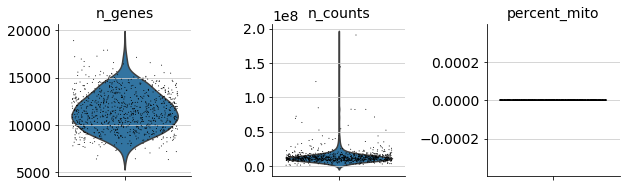

In [13]:
sc.pl.violin(P02, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

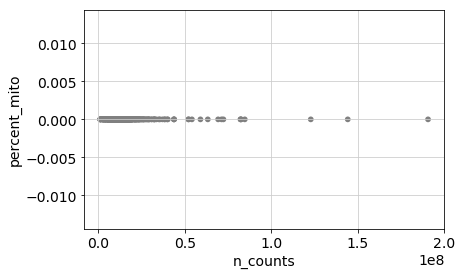

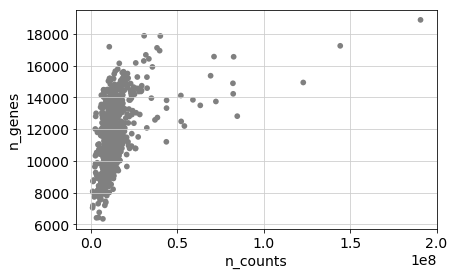

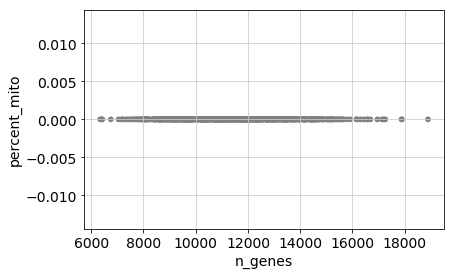

In [14]:
sc.pl.scatter(P02, x='n_counts',y='percent_mito')
sc.pl.scatter(P02, x='n_counts',y='n_genes')
sc.pl.scatter(P02, x='n_genes',y='percent_mito')

In [15]:
P02 = P02[P02.obs['n_genes'] < 16000, :]
print(P02.shape)

(898, 33898)


In [16]:
P02.raw = sc.pp.log1p(P02, copy=True)
P02.var_names_make_unique

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 898 × 33898 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'>

In [17]:
sc.pp.normalize_per_cell(P02, counts_per_cell_after=20000)
filter_result = sc.pp.filter_genes_dispersion(P02.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'signed char'

In [18]:
P02.raw = sc.pp.log1p(P02, copy=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
sc.tl.pca(P02)

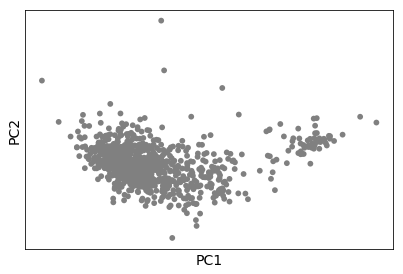

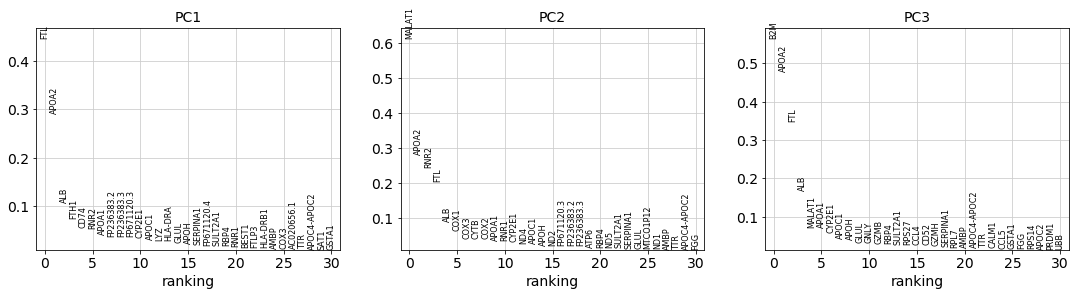

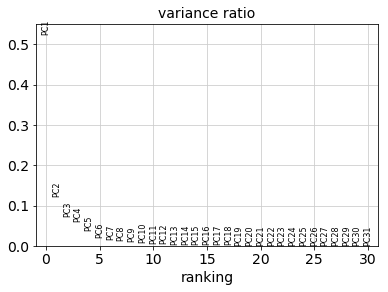

In [20]:
sc.pl.pca(P02)

In [21]:
sc.tl.tsne(P02, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:01.82) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [22]:
import MulticoreTSNE

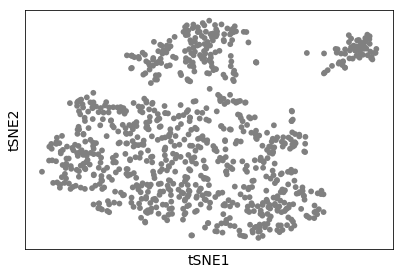

In [23]:
sc.pl.tsne(P02)

In [24]:
sc.pp.neighbors(P02, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03.43) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [25]:
P02.obs

,n_genes,percent_mito,n_counts
P02_A_0925,11755,0.0,8301043.0
P02_A_0926,11611,0.0,5695071.0
P02_A_0927,10659,0.0,5994274.0
P02_A_0928,10993,0.0,8595596.0
P02_A_0929,11897,0.0,5938872.0
P02_A_0930,11738,0.0,5630615.0
P02_A_0931,12031,0.0,7913389.0
P02_A_0932,11853,0.0,7876506.0
P02_A_0935,10472,0.0,4050691.0
P02_A_0936,13753,0.0,12984275.0


In [26]:
sc.tl.pca(P02)

In [27]:
from sklearn.cluster import Birch
import numpy as np

In [28]:
brc = Birch(branching_factor=50, n_clusters=13, threshold=0.5, 
            compute_labels=True)

In [29]:
brc.fit(P02.X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=13,
   threshold=0.5)

In [30]:
brc.predict(P02.X)

array([ 7,  8,  5,  2,  7,  8,  7,  7,  7,  7,  7,  7,  8,  8,  8,  7,  8,
        7,  8,  7,  7,  7,  7,  8, 10,  7,  8,  8,  5,  7,  7,  7,  5,  7,
        8,  7,  7,  2,  7,  7,  2,  7,  7,  7,  7, 10,  8,  5,  3,  8,  7,
        9,  9,  9,  3,  3,  9,  3, 10,  3, 11,  9,  3,  3,  9, 12,  3,  9,
        0,  9, 12, 10, 12,  3,  9,  3,  3, 11,  8, 12,  3,  3,  9,  3,  3,
       10, 10,  9,  3,  3,  3, 12,  3,  9,  3,  3,  3,  3, 12,  0,  3, 12,
        3,  9, 10, 12, 12, 12, 10,  3, 12,  9,  3,  9, 11,  9, 11,  9, 12,
        9,  8,  9, 10,  9,  3, 11, 11,  9,  3, 11,  9,  3, 12,  9,  3,  3,
        3,  9,  3,  7, 12,  3,  9,  9, 11,  2,  0,  7,  0, 11, 12,  0, 11,
       11,  0,  5,  8, 11, 11,  0,  7,  0, 12,  5,  0, 10, 11,  9,  0,  2,
       11,  0,  0,  0,  0,  8,  0,  0,  0,  5,  0, 11,  5,  0,  9,  0,  2,
        2, 11,  0, 11, 12, 11, 11,  0,  0,  5, 11, 11,  2,  0,  0, 11,  2,
        2,  0,  0, 12, 11,  5, 10,  3,  7,  7,  5,  0,  0,  0, 11,  0, 11,
       11, 11, 11, 11,  0

In [31]:
print(brc.predict(P02.X))

[ 7  8  5  2  7  8  7  7  7  7  7  7  8  8  8  7  8  7  8  7  7  7  7  8
 10  7  8  8  5  7  7  7  5  7  8  7  7  2  7  7  2  7  7  7  7 10  8  5
  3  8  7  9  9  9  3  3  9  3 10  3 11  9  3  3  9 12  3  9  0  9 12 10
 12  3  9  3  3 11  8 12  3  3  9  3  3 10 10  9  3  3  3 12  3  9  3  3
  3  3 12  0  3 12  3  9 10 12 12 12 10  3 12  9  3  9 11  9 11  9 12  9
  8  9 10  9  3 11 11  9  3 11  9  3 12  9  3  3  3  9  3  7 12  3  9  9
 11  2  0  7  0 11 12  0 11 11  0  5  8 11 11  0  7  0 12  5  0 10 11  9
  0  2 11  0  0  0  0  8  0  0  0  5  0 11  5  0  9  0  2  2 11  0 11 12
 11 11  0  0  5 11 11  2  0  0 11  2  2  0  0 12 11  5 10  3  7  7  5  0
  0  0 11  0 11 11 11 11 11  0  2  0  0  5  2  5 11  2 11  5  2  8  2  2
 10  8  2  2  2  2  0  0  8  2  0  0  0  0 11 11  7  0  0  7 11 10 11  0
  0  8  0  0  2 11 11  2 11  0 11  0  0 11  0  0  0  0  8  7  0 11 11  0
  0  0  0  0  8  2  0  2  8  7  5  0  2  5  8 11 11 11  0  0  0  8 11  2
  2  0  0 11 11 11  5  2  9 11  8  0  2  0  0  7 11

In [32]:
df = pd.DataFrame(brc.predict(P02.X))
df.columns=['Birch']
df

,Birch
0,7
1,8
2,5
3,2
4,7
5,8
6,7
7,7
8,7
9,7


In [33]:
icantbelievethatworked = pd.merge(P02.obs, P02.obs)

In [34]:
W = pd.concat([icantbelievethatworked, df], axis=1, join='inner')

In [35]:
sc.tl.rank_genes_groups(P02, 'KMean')
sc.pl.rank_genes_groups(P02, n_genes=20,)

ranking genes


KeyError: 'KMean'

In [36]:
P02_louvain=pd.DataFrame(P02.uns['rank_genes_groups']['names']).head(15)
P02_louvain

KeyError: 'rank_genes_groups'

In [37]:
P02.obs

,n_genes,percent_mito,n_counts
P02_A_0925,11755,0.0,8301043.0
P02_A_0926,11611,0.0,5695071.0
P02_A_0927,10659,0.0,5994274.0
P02_A_0928,10993,0.0,8595596.0
P02_A_0929,11897,0.0,5938872.0
P02_A_0930,11738,0.0,5630615.0
P02_A_0931,12031,0.0,7913389.0
P02_A_0932,11853,0.0,7876506.0
P02_A_0935,10472,0.0,4050691.0
P02_A_0936,13753,0.0,12984275.0


In [38]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/LiverCancer/BGI_LiverCancer/'
Annotation = pd.read_csv(path + 'P02_HCC_cellannotation.csv')

In [39]:
Annotation

,ID,Patient,Marker,Source,P02_Cluster,Cell_Type
0,P02_A_0939,P02,CD45p,Adjacent,0,CD8_GZMK
1,P02_A_0940,P02,CD45p,Adjacent,0,CD8_GZMK
2,P02_A_0942,P02,CD45p,Adjacent,0,CD8_GZMK
3,P02_A_0957,P02,CD45p,Adjacent,0,CD8_GZMK
4,P02_A_0958,P02,CD45p,Adjacent,0,CD8_GZMK
5,P02_A_0960,P02,CD45p,Adjacent,0,CD8_GZMK
6,P02_A_0967,P02,CD45p,Adjacent,0,CD8_GZMK
7,P02_A_0969,P02,CD45p,Adjacent,0,CD8_GZMK
8,P02_A_0973,P02,CD45p,Adjacent,0,CD8_GZMK
9,P02_T_0077,P02,CD45p,HCC,0,CD8_GZMK


In [40]:
Accuracy = pd.concat([W, Annotation], axis=1, sort=True)
Accuracy

,n_genes,percent_mito,n_counts,Birch,ID,Patient,Marker,Source,P02_Cluster,Cell_Type
0,11755.0,0.0,8301043.0,7.0,P02_A_0939,P02,CD45p,Adjacent,0,CD8_GZMK
1,11611.0,0.0,5695071.0,8.0,P02_A_0940,P02,CD45p,Adjacent,0,CD8_GZMK
2,10659.0,0.0,5994274.0,5.0,P02_A_0942,P02,CD45p,Adjacent,0,CD8_GZMK
3,10993.0,0.0,8595596.0,2.0,P02_A_0957,P02,CD45p,Adjacent,0,CD8_GZMK
4,11897.0,0.0,5938872.0,7.0,P02_A_0958,P02,CD45p,Adjacent,0,CD8_GZMK
5,11738.0,0.0,5630615.0,8.0,P02_A_0960,P02,CD45p,Adjacent,0,CD8_GZMK
6,12031.0,0.0,7913389.0,7.0,P02_A_0967,P02,CD45p,Adjacent,0,CD8_GZMK
7,11853.0,0.0,7876506.0,7.0,P02_A_0969,P02,CD45p,Adjacent,0,CD8_GZMK
8,10472.0,0.0,4050691.0,7.0,P02_A_0973,P02,CD45p,Adjacent,0,CD8_GZMK
9,13753.0,0.0,12984275.0,7.0,P02_T_0077,P02,CD45p,HCC,0,CD8_GZMK


In [41]:
Test = Accuracy.groupby(["Birch","P02_Cluster"]).size()

In [42]:
print(Test)

Birch  P02_Cluster
0.0    0              18
       1              60
       2              32
       3              20
       4              23
       5              16
       6              11
       8               1
       9               5
       10              3
       11             17
1.0    7              10
       8               4
       9               1
       11              1
2.0    0               5
       1              27
       2               3
       3               1
       4               9
       5              10
       6               9
       8               1
       9               3
       10              1
       11              2
3.0    0              35
       1               3
       2               7
       3               2
                      ..
9.0    4               5
       5               1
       6               1
       11              2
10.0   0              10
       1               4
       2               3
       3               3
      